In [26]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [27]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
purchase = data[['Spending Score (1-100)']]

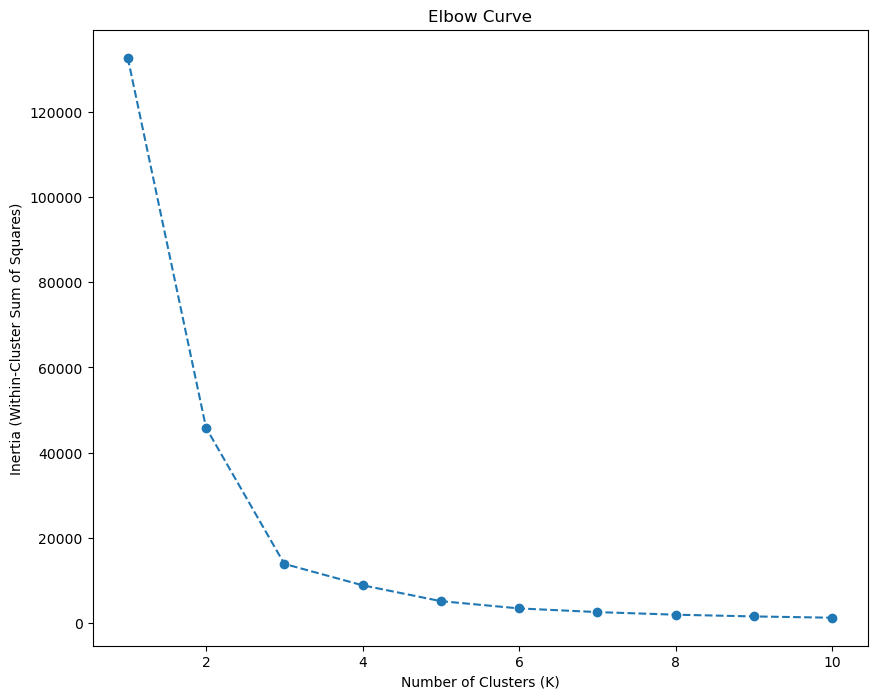

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(purchase)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.show()

In [30]:
k = 2

kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(purchase)

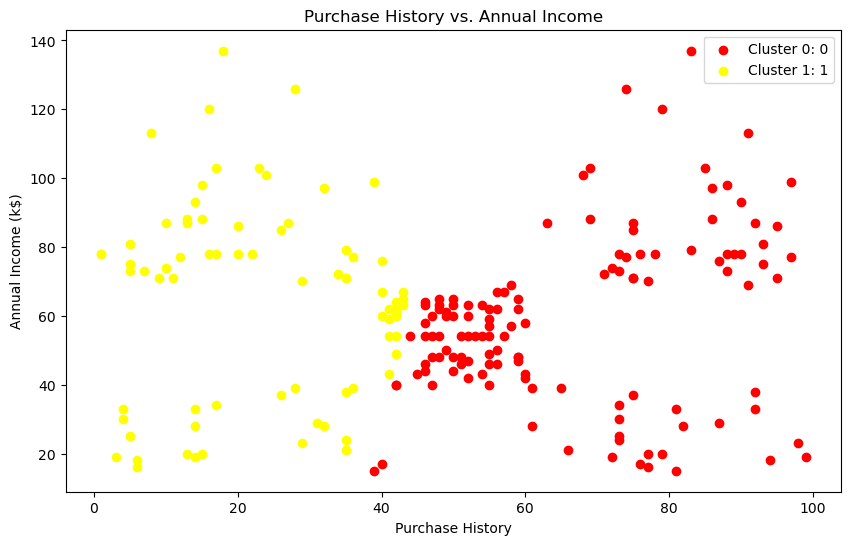

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

cluster_data = data[['Spending Score (1-100)', 'Annual Income (k$)']]



scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

cluster_data['Cluster Name'] = cluster_data['Cluster']

plt.figure(figsize=(10, 6))
colors = [ 'red', 'yellow']
for i, cluster in enumerate(cluster_data['Cluster'].unique()):
    subset = cluster_data[cluster_data['Cluster'] == cluster]
    plt.scatter(subset['Spending Score (1-100)'], subset['Annual Income (k$)'], label=f'Cluster {cluster}: {subset["Cluster Name"].iloc[0]}', color=colors[i])

plt.xlabel('Purchase History')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.title('Purchase History vs. Annual Income')
plt.show()